## LSTM Stock Forecasting

### Import Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings

warnings.filterwarnings('ignore')

### Load & Prepare Data

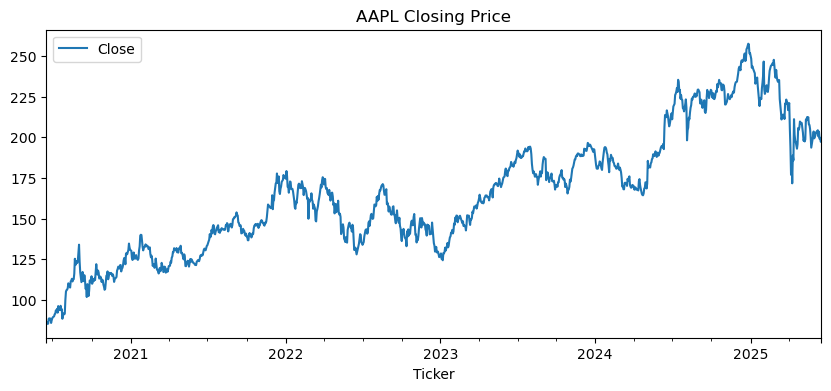

In [2]:
df = pd.read_csv('../data/AAPL.csv', header=1)
df = df[df['Ticker'] != 'Date'].copy()
df['Ticker'] = pd.to_datetime(df['Ticker'])
df.set_index('Ticker', inplace=True)
df = df.asfreq('B')
df['Close'] = pd.to_numeric(df['AAPL.3'], errors='coerce')
df['Close'].interpolate(method='linear', inplace=True)

df = df[['Close']].copy()
df.plot(title='AAPL Closing Price', figsize=(10, 4))
plt.show()

### Normalize & Prepare Sequences

In [8]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Create sequences
def create_sequences(data, window_size=90):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 90
X, y = create_sequences(scaled_data, window_size)

# Train-test split
split = int(0.85 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


### Build & Train the LSTM Model

In [15]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)],
    verbose=1
)


Epoch 1/10
33/33 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 44ms/step - loss: 0.0896 - val_loss: 0.0035
Epoch 2/10
33/33 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 42ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 3/10
33/33 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 39ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 4/10
33/33 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 37ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 5/10
33/33 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 38ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 6/10
33/33 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 37ms/step - loss: 0.0025 - val_loss: 0.0038
Epoch 7/10
33/33 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 43ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 8/10
33/33 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 40ms/step - loss: 0.0035 - val_loss: 0.0032


### Forecast & Inverse Transform

6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 45ms/step


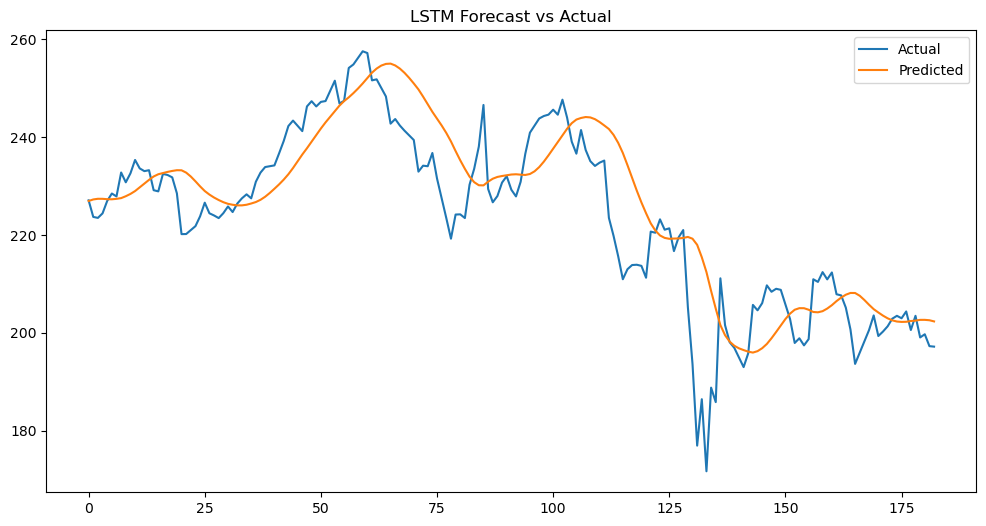

In [16]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Forecast vs Actual')
plt.legend()
plt.show()


### Evaluate

In [17]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from evaluate_models import evaluate_forecast, print_evaluation

results = evaluate_forecast(y_test_actual.flatten(), predictions.flatten(), model_name='LSTM')
print_evaluation(results)



üìä Evaluation for LSTM
------------------------------
MAE : 7.0510
MSE : 93.9247
RMSE: 9.6915
